In [1]:
import pandas as pd
import numpy as np

from selenium import webdriver
from selenium.webdriver.common. by import By
from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium.webdriver.common.keys import Keys
import time

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [4]:
from scipy.stats import shapiro # 정규성 검정
from scipy.stats import ttest_ind, ttest_rel, bartlett

In [116]:
import sqlite3

## 서울시 지역별 임대료 데이터 불러오기

In [5]:
rent_df = pd.read_csv("./서울시_임대료_데이터.csv", encoding="CP949", skiprows = 1)
rent_df = rent_df.drop("Unnamed: 0", axis = 1)
rent_df = rent_df.rename(columns = {"Unnamed: 1" : "지역"})
rent_data = rent_df.set_index("지역")

rent_data.columns = ["중대형 지하1층", "중대형 1층", "중대형 2층", "중대형 3층", "중대형 4층", "중대형 5층", "중대형 6-10층",
                                   "소형 지하1층", "소형 1층", "소형 2층"]
rent_data.head()

,중대형 지하1층,중대형 1층,중대형 2층,중대형 3층,중대형 4층,중대형 5층,중대형 6-10층,소형 지하1층,소형 1층,소형 2층
지역,,,,,,,,,,
전체,15.4,52.5,23.9,19.0,17.7,17.8,17.4,23.4,49.4,25.7
광화문,28.1,80.7,41.1,30.1,24.3,23.4,23.8,NaN,83.2,41.8
남대문,19.6,69.0,24.6,19.9,18.2,15.3,16.9,NaN,64.3,24.1
동대문,13.8,45.6,18.7,15.0,14.4,17.1,19.9,8.5,48.0,21.9
명동,28.9,194.0,79.4,59.5,54.4,42.5,35.8,40.2,140.4,50.9


In [6]:
# data의 NaN값 0으로 치환
rent_data = rent_data.fillna(0)

In [7]:
rent_data.head()

,중대형 지하1층,중대형 1층,중대형 2층,중대형 3층,중대형 4층,중대형 5층,중대형 6-10층,소형 지하1층,소형 1층,소형 2층
지역,,,,,,,,,,
전체,15.4,52.5,23.9,19.0,17.7,17.8,17.4,23.4,49.4,25.7
광화문,28.1,80.7,41.1,30.1,24.3,23.4,23.8,0.0,83.2,41.8
남대문,19.6,69.0,24.6,19.9,18.2,15.3,16.9,0.0,64.3,24.1
동대문,13.8,45.6,18.7,15.0,14.4,17.1,19.9,8.5,48.0,21.9
명동,28.9,194.0,79.4,59.5,54.4,42.5,35.8,40.2,140.4,50.9


In [8]:
rent_data.shape

(55, 10)

In [9]:
rent_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55 entries, 전체 to 화곡
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   중대형 지하1층   55 non-null     float64
 1   중대형 1층     55 non-null     float64
 2   중대형 2층     55 non-null     float64
 3   중대형 3층     55 non-null     float64
 4   중대형 4층     55 non-null     float64
 5   중대형 5층     55 non-null     float64
 6   중대형 6-10층  55 non-null     float64
 7   소형 지하1층    55 non-null     float64
 8   소형 1층      55 non-null     float64
 9   소형 2층      55 non-null     float64
dtypes: float64(10)
memory usage: 4.7+ KB


In [10]:
rent_data.describe()

,중대형 지하1층,중대형 1층,중대형 2층,중대형 3층,중대형 4층,중대형 5층,중대형 6-10층,소형 지하1층,소형 1층,소형 2층
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,15.316364,52.650909,24.001818,18.810909,17.187273,16.305455,14.632727,16.705455,50.354545,25.065455
std,5.770576,25.167975,10.257635,7.596482,7.193440,5.865859,9.165132,13.316551,19.288404,10.254560
min,7.400000,27.100000,14.100000,10.600000,9.100000,9.100000,0.000000,0.000000,26.000000,9.800000
25%,11.650000,38.550000,17.900000,14.500000,12.850000,12.200000,10.850000,9.150000,37.300000,16.700000
50%,13.600000,47.200000,21.100000,16.800000,15.600000,15.200000,16.000000,16.000000,46.700000,23.500000
75%,17.300000,59.950000,27.200000,20.900000,18.850000,18.000000,20.650000,22.150000,58.650000,31.750000
max,34.400000,194.000000,79.400000,59.500000,54.400000,42.500000,35.800000,54.100000,140.400000,52.400000


In [11]:
rent_data.dtypes

중대형 지하1층     float64
중대형 1층       float64
중대형 2층       float64
중대형 3층       float64
중대형 4층       float64
중대형 5층       float64
중대형 6-10층    float64
소형 지하1층      float64
소형 1층        float64
소형 2층        float64
dtype: object

## 지역별 어느 자치구에 속하는지 카카오맵 크롤링을 통해 자치구 찾기

In [12]:
# 카카오맵 url 가져오기
url = "https://m.map.kakao.com/"

# rent_data에 자치구 열추가할 초기 리스트
region_list = ["전체"]

# 요소검색
for i in rent_data.index[1:]:
    # 각 지역 검색시마다 브라우져 열고 닫기
    driver = webdriver.Chrome( )
    driver.get(url)  # url 접속
    
    driver.implicitly_wait(1) # 대기시간
    
    search = driver.find_element(By.CSS_SELECTOR, "input#innerQuery") # 카카오맵의 input 위치
    search.send_keys(f"서울 {i}") # 지역 index를 각각 "서울 + index" 로 검색
    search.send_keys(Keys.ENTER)

    driver.implicitly_wait(5) # 대기시간

    soup = BeautifulSoup(driver.page_source, "lxml")
    
    # try-except 구문으로 주소를 제대로 가져오는지 확인
    try :
        # BeautifulSoup으로 가져온 페이지소스에서 주소가 있다면 주소로 자치구 확인
        if soup.select("#addressList > li.search_item.base strong.tit_g"):
            addr = soup.select("#addressList > li.search_item.base strong.tit_g")
            region_list.append(addr[0].string.split(" ")[1])
        
        # 페이지소스에 주소가 없다면 장소로 자치구 확인
        else:
            addr = soup.select("#placeList > li:nth-child(1) span.txt_g")
            region_list.append(addr[0].string.split(" ")[1])
            
    except AttributeError:
        print(f"지역 {i}의 검색결과가 없거나 문자열을 스플릿 할 수 없습니다")
    
    driver.implicitly_wait(2) # 대기시간
    
    driver.close() 

In [13]:
rent_data["자치구"]= region_list

In [14]:
rent_data.head()

,중대형 지하1층,중대형 1층,중대형 2층,중대형 3층,중대형 4층,중대형 5층,중대형 6-10층,소형 지하1층,소형 1층,소형 2층,자치구
지역,,,,,,,,,,,
전체,15.4,52.5,23.9,19.0,17.7,17.8,17.4,23.4,49.4,25.7,전체
광화문,28.1,80.7,41.1,30.1,24.3,23.4,23.8,0.0,83.2,41.8,종로구
남대문,19.6,69.0,24.6,19.9,18.2,15.3,16.9,0.0,64.3,24.1,중구
동대문,13.8,45.6,18.7,15.0,14.4,17.1,19.9,8.5,48.0,21.9,동대문구
명동,28.9,194.0,79.4,59.5,54.4,42.5,35.8,40.2,140.4,50.9,중구


## 자치구 및 지역(상권위치)로 멀티인덱스 설정

In [15]:
rent_data_df = rent_data.reset_index(drop = False)
rent_data_df.sort_values("자치구", ascending = False, inplace = True)
rent_data_df.set_index(["자치구", "지역"], inplace = True)
rent_data_df = rent_data_df.reindex([("전체", "전체")] + [i for i in rent_data_df.index if i != ("전체", "전체")])
rent_data_df = rent_data_df.drop("전체")
rent_data_df

C:\Users\ITSC\AppData\Local\Temp\ipykernel_8692\923235846.py:5: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  rent_data_df = rent_data_df.drop("전체")


중대형 지하1층  중대형 1층  중대형 2층  중대형 3층  중대형 4층  중대형 5층  중대형 6-10층  \
자치구  지역                                                                    
중랑구  상봉역         12.3    38.0    19.0    16.2    12.3    15.5       28.1   
중구   남대문         19.6    69.0    24.6    19.9    18.2    15.3       16.9   
     명동          28.9   194.0    79.4    59.5    54.4    42.5       35.8   
     시청          20.4    65.3    32.9    20.9    19.1    18.2       14.4   
     을지로          9.5    51.7    18.1    15.3    13.8    13.8        0.0   
     충무로          8.7    51.9    21.6    18.4    15.9    12.5        0.0   
종로구  광화문         28.1    80.7    41.1    30.1    24.3    23.4       23.8   
     혜화동         17.2    62.9    26.1    20.9    18.9    16.4       14.3   
     종로          16.6    77.4    31.2    21.4    18.4    17.4       18.4   
은평구  불광역         14.8    44.5    19.3    14.6    13.9    15.6       15.0   
     연신내         15.8    47.7    21.4    14.5    12.0    11.5        0.0   
용산구  숙명여대        10.9    38.6    19.6    14.5    13.0     9.9        0.0   
     이태원         17.4    56.1    34.0    29.8    33.3    24.7       30.1   
     용산역         11.8    27.1    14.9    13.1    13.0     9.9       12.1   
영등포구 영등포역        11.6    39.5    17.5    13.0    11.3    12.3       16.2   
     당산역          7.4    29.7    16.8    11.5     9.1    11.8       13.1   
양천구  목동          10.5    33.8    15.6    14.0    13.2    13.8       12.4   
송파구  잠실새내역       11.0    36.6    18.4    15.4    15.6    15.8       23.6   
     잠실/송파       12.0    44.8    17.6    14.8    15.6    14.8       17.3   
     가락시장        12.2    38.5    16.3    13.6    12.3    15.2       21.9   
성동구  뚝섬          11.8    46.7    21.6    17.9    18.8    18.7       19.6   
     왕십리         14.5    42.4    16.7    14.2    13.1    12.3        0.0   
서초구  남부터미널       11.0    31.4    19.4    17.4    15.7    16.5       20.4   
     교대역         13.1    35.0    20.7    18.9    17.9    18.3       25.3   
서대문구 신촌/이대       13.8    63.2    24.6    17.5    15.9    14.9       16.0   
마포구  홍대/합정       27.1    66.4    31.7    24.1    21.8    19.6       20.9   
     망원역         12.6    32.5    17.7    16.6    18.1    17.3       13.7   
     동교/연남       24.7    43.0    26.6    20.7    18.6    14.0        0.0   
     공덕역         13.3    39.4    21.1    14.7    15.6    17.0       16.1   
동작구  노량진         13.6    47.3    22.6    16.8    16.5    14.9       18.8   
     사당          15.9    60.2    27.5    22.9    19.2    17.4       13.3   
동대문구 장안동         11.7    36.6    16.7    11.9    11.5     9.1        0.0   
     청량리          7.7    45.4    18.8    14.0    11.7    11.5       10.9   
     경희대         12.3    49.7    18.2    13.9    12.7    10.7        0.0   
     동대문         13.8    45.6    18.7    15.0    14.4    17.1       19.9   
노원구  상계역          8.4    29.6    14.4    12.2    10.9    12.1        0.0   
금천구  독산/시흥       11.7    33.2    14.1    10.6     9.3    11.4        0.0   
구로구  오류동역        11.7    45.2    18.8    13.0    11.7     9.1        0.0   
광진구  군자          11.0    36.2    18.6    14.5    14.2    14.3       21.0   
     건대입구        17.6    68.9    27.0    18.4    16.3    11.6        6.4   
관악구  서울대입구역      20.2    80.7    31.8    25.5    25.9    28.2       21.1   
     신림역         16.6    64.9    26.0    18.4    13.4    14.3       15.0   
강서구  화곡          10.7    35.2    16.3    14.8    12.3    10.1        9.0   
강북구  미아사거리       10.2    38.8    17.2    13.8    11.7    12.0       19.5   
     수유          13.4    50.8    17.1    15.3    12.3    13.5       12.7   
     성신여대        15.9    48.2    22.4    17.2    13.5    13.3       10.8   
강동구  천호          11.1    47.2    20.5    15.2    13.5    12.0       12.1   
강남구  청담          17.7    59.7    28.5    23.2    22.0    23.0       32.9   
     압구정         16.2    52.4    29.6    26.3    27.5    23.1       21.7   
     신사역         23.7    86.7    33.6    25.0    21.9    18.9       17.0   
     도산대로        20.9    45.5    27.4    23.4    21.9    24.0

## 사업체 및 종사자 수 데이터 불러오기

In [17]:
emp_df = pd.read_excel("./Data/사업체+및+종사자+밀도(동별)_20240312165222.xlsx", skiprows = 1)
emp_df = emp_df.drop("동별(1)", axis = 1)
emp_df = emp_df.rename(columns = {"동별(2)" : "자치구"})
emp_data = emp_df.set_index("자치구")

level1_columns = []
for i in range(2016, 2022):
    for j in range(7):
        level1_columns.append(str(i))
level2_columns = []
for i in range(6):
    for j in ["사업체수", "종사자수", "평균종사자", "사업체밀도", "종사자밀도(A)", "인구밀도(B)", "종사자밀도비(A/B*100)"]:
        level2_columns.append(j)

emp_data.columns = [level1_columns, level2_columns]

emp_data.head()

C:\ProgramData\anaconda4\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


2016                                                        2017  \
      사업체수    종사자수 평균종사자 사업체밀도 종사자밀도(A) 인구밀도(B) 종사자밀도비(A/B*100)   사업체수   
자치구                                                                      
종로구  40664  268309  6.60  1701    11220    6771          165.70  40490   
중구   63640  402892  6.33  6389    40447   13494          299.75  62936   
용산구  20994  129033  6.15   960     5901   11209           52.64  20806   
성동구  26581  165047  6.21  1577     9789   18218           53.73  27278   
광진구  24895  126937  5.10  1459     7439   21807           34.11  24688   

                   ...      2020                             2021          \
       종사자수 평균종사자  ...  종사자밀도(A)   인구밀도(B) 종사자밀도비(A/B*100)   사업체수    종사자수   
자치구                ...                                                      
종로구  268702  6.64  ...  11900.14   6648.89          178.98  48361  275063   
중구   386648  6.14  ...  40969.03  13517.16          303.09  70308  386564   
용산구  133260  6.40  ...   7056.02  11188.30           63.07  29680  152605   
성동구  167308  6.13  ...  11646.82  17822.49           65.35  41665  203221   
광진구  125170  5.07  ...   7866.76  21104.75           37.27  33706  129707   

                                                        
    평균종사자    사업체밀도  종사자밀도(A)   인구밀도(B) 종사자밀도비(A/B*100)  
자치구                                                     
종로구  5.69  2022.38  11502.69   6431.21          178.86  
중구   5.50  7058.85  38810.63  13231.28          293.32  
용산구  5.14  1357.35   6979.05  10851.71           64.31  
성동구  4.88  2471.25  12053.51  17359.06           69.44  
광진구  3.85  1975.39   7601.65  20666.18           36.78  

[5 rows x 42 columns]

In [18]:
emp_2016 = emp_data["2016"]
emp_2017 = emp_data["2017"]
emp_2018 = emp_data["2018"]
emp_2019 = emp_data["2019"]
emp_2020 = emp_data["2020"]
emp_2021 = emp_data["2021"] # 사용할 데이터

In [19]:
join_rent_to_emp = rent_data_df.join(emp_2021, on = "자치구")
join_rent_to_emp

중대형 지하1층  중대형 1층  중대형 2층  중대형 3층  중대형 4층  중대형 5층  중대형 6-10층  \
자치구  지역                                                                    
중랑구  상봉역         12.3    38.0    19.0    16.2    12.3    15.5       28.1   
중구   남대문         19.6    69.0    24.6    19.9    18.2    15.3       16.9   
     명동          28.9   194.0    79.4    59.5    54.4    42.5       35.8   
     시청          20.4    65.3    32.9    20.9    19.1    18.2       14.4   
     을지로          9.5    51.7    18.1    15.3    13.8    13.8        0.0   
     충무로          8.7    51.9    21.6    18.4    15.9    12.5        0.0   
종로구  광화문         28.1    80.7    41.1    30.1    24.3    23.4       23.8   
     혜화동         17.2    62.9    26.1    20.9    18.9    16.4       14.3   
     종로          16.6    77.4    31.2    21.4    18.4    17.4       18.4   
은평구  불광역         14.8    44.5    19.3    14.6    13.9    15.6       15.0   
     연신내         15.8    47.7    21.4    14.5    12.0    11.5        0.0   
용산구  숙명여대        10.9    38.6    19.6    14.5    13.0     9.9        0.0   
     이태원         17.4    56.1    34.0    29.8    33.3    24.7       30.1   
     용산역         11.8    27.1    14.9    13.1    13.0     9.9       12.1   
영등포구 영등포역        11.6    39.5    17.5    13.0    11.3    12.3       16.2   
     당산역          7.4    29.7    16.8    11.5     9.1    11.8       13.1   
양천구  목동          10.5    33.8    15.6    14.0    13.2    13.8       12.4   
송파구  잠실새내역       11.0    36.6    18.4    15.4    15.6    15.8       23.6   
     잠실/송파       12.0    44.8    17.6    14.8    15.6    14.8       17.3   
     가락시장        12.2    38.5    16.3    13.6    12.3    15.2       21.9   
성동구  뚝섬          11.8    46.7    21.6    17.9    18.8    18.7       19.6   
     왕십리         14.5    42.4    16.7    14.2    13.1    12.3        0.0   
서초구  남부터미널       11.0    31.4    19.4    17.4    15.7    16.5       20.4   
     교대역         13.1    35.0    20.7    18.9    17.9    18.3       25.3   
서대문구 신촌/이대       13.8    63.2    24.6    17.5    15.9    14.9       16.0   
마포구  홍대/합정       27.1    66.4    31.7    24.1    21.8    19.6       20.9   
     망원역         12.6    32.5    17.7    16.6    18.1    17.3       13.7   
     동교/연남       24.7    43.0    26.6    20.7    18.6    14.0        0.0   
     공덕역         13.3    39.4    21.1    14.7    15.6    17.0       16.1   
동작구  노량진         13.6    47.3    22.6    16.8    16.5    14.9       18.8   
     사당          15.9    60.2    27.5    22.9    19.2    17.4       13.3   
동대문구 장안동         11.7    36.6    16.7    11.9    11.5     9.1        0.0   
     청량리          7.7    45.4    18.8    14.0    11.7    11.5       10.9   
     경희대         12.3    49.7    18.2    13.9    12.7    10.7        0.0   
     동대문         13.8    45.6    18.7    15.0    14.4    17.1       19.9   
노원구  상계역          8.4    29.6    14.4    12.2    10.9    12.1        0.0   
금천구  독산/시흥       11.7    33.2    14.1    10.6     9.3    11.4        0.0   
구로구  오류동역        11.7    45.2    18.8    13.0    11.7     9.1        0.0   
광진구  군자          11.0    36.2    18.6    14.5    14.2    14.3       21.0   
     건대입구        17.6    68.9    27.0    18.4    16.3    11.6        6.4   
관악구  서울대입구역      20.2    80.7    31.8    25.5    25.9    28.2       21.1   
     신림역         16.6    64.9    26.0    18.4    13.4    14.3       15.0   
강서구  화곡          10.7    35.2    16.3    14.8    12.3    10.1        9.0   
강북구  미아사거리       10.2    38.8    17.2    13.8    11.7    12.0       19.5   
     수유          13.4    50.8    17.1    15.3    12.3    13.5       12.7   
     성신여대        15.9    48.2    22.4    17.2    13.5    13.3       10.8   
강동구  천호          11.1    47.2    20.5    15.2    13.5    12.0       12.1   
강남구  청담          17.7    59.7    28.5    23.2    22.0    23.0       32.9   
     압구정         16.2    52.4    29.6    26.3    27.5    23.1       21.7   
     신사역         23.7    86.7    33.6    25.0    21.9    18.9       17.0   
     도산대로        20.9    45.5    27.4    23.4    21.9    24.0

## 자치구별 인구수 데이터 불러오기

In [21]:
region_people = pd.read_csv(r"C:\Users\ITSC\Desktop\2st_miniprj\서울시_거주인구.csv")
region_people = region_people.iloc[:, [0,1,26]]
region_people = region_people[(region_people["Unnamed: 1"] == "합계") | (region_people["Unnamed: 1"] == "계")]
region_people = region_people.drop("Unnamed: 1", axis = 1)
region_people.columns = ["자치구", "자치구별 인구"]
region_people = region_people.set_index("자치구")
region_people["자치구별 인구"] = region_people["자치구별 인구"].str.replace(",", "").astype(int)
region_people = region_people.join(emp_2021, on = "자치구")[["종사자밀도(A)", "종사자수", "자치구별 인구"]]
region_people

,종사자밀도(A),종사자수,자치구별 인구
자치구,,,
종로구,11502.69,275063,150453
중구,38810.63,386564,131793
용산구,6979.05,152605,227106
성동구,12053.51,203221,284766
광진구,7601.65,129707,351180
동대문구,10297.20,146383,359873
중랑구,6117.35,113144,387470
성북구,5045.53,124004,438168
강북구,3399.17,80222,292977


In [22]:
# 데이터 전처리
region_people["종사자수/자치구별인구"] = round(region_people["종사자수"] / region_people["자치구별 인구"] * 100, 2)
# region_people["종사자수/자치구별인구 비율"] = round(region_people["종사자수/자치구별인구"] / region_people["종사자수/자치구별인구"].sum() * 100, 2)
region_people

,종사자밀도(A),종사자수,자치구별 인구,종사자수/자치구별인구
자치구,,,,
종로구,11502.69,275063,150453,182.82
중구,38810.63,386564,131793,293.31
용산구,6979.05,152605,227106,67.20
성동구,12053.51,203221,284766,71.36
광진구,7601.65,129707,351180,36.93
동대문구,10297.20,146383,359873,40.68
중랑구,6117.35,113144,387470,29.20
성북구,5045.53,124004,438168,28.30
강북구,3399.17,80222,292977,27.38


## 자치구별 인구수 데이터 조인

In [23]:
join_data = rent_data_df.join(region_people, on = "자치구")
join_data

중대형 지하1층  중대형 1층  중대형 2층  중대형 3층  중대형 4층  중대형 5층  중대형 6-10층  \
자치구  지역                                                                    
중랑구  상봉역         12.3    38.0    19.0    16.2    12.3    15.5       28.1   
중구   남대문         19.6    69.0    24.6    19.9    18.2    15.3       16.9   
     명동          28.9   194.0    79.4    59.5    54.4    42.5       35.8   
     시청          20.4    65.3    32.9    20.9    19.1    18.2       14.4   
     을지로          9.5    51.7    18.1    15.3    13.8    13.8        0.0   
     충무로          8.7    51.9    21.6    18.4    15.9    12.5        0.0   
종로구  광화문         28.1    80.7    41.1    30.1    24.3    23.4       23.8   
     혜화동         17.2    62.9    26.1    20.9    18.9    16.4       14.3   
     종로          16.6    77.4    31.2    21.4    18.4    17.4       18.4   
은평구  불광역         14.8    44.5    19.3    14.6    13.9    15.6       15.0   
     연신내         15.8    47.7    21.4    14.5    12.0    11.5        0.0   
용산구  숙명여대        10.9    38.6    19.6    14.5    13.0     9.9        0.0   
     이태원         17.4    56.1    34.0    29.8    33.3    24.7       30.1   
     용산역         11.8    27.1    14.9    13.1    13.0     9.9       12.1   
영등포구 영등포역        11.6    39.5    17.5    13.0    11.3    12.3       16.2   
     당산역          7.4    29.7    16.8    11.5     9.1    11.8       13.1   
양천구  목동          10.5    33.8    15.6    14.0    13.2    13.8       12.4   
송파구  잠실새내역       11.0    36.6    18.4    15.4    15.6    15.8       23.6   
     잠실/송파       12.0    44.8    17.6    14.8    15.6    14.8       17.3   
     가락시장        12.2    38.5    16.3    13.6    12.3    15.2       21.9   
성동구  뚝섬          11.8    46.7    21.6    17.9    18.8    18.7       19.6   
     왕십리         14.5    42.4    16.7    14.2    13.1    12.3        0.0   
서초구  남부터미널       11.0    31.4    19.4    17.4    15.7    16.5       20.4   
     교대역         13.1    35.0    20.7    18.9    17.9    18.3       25.3   
서대문구 신촌/이대       13.8    63.2    24.6    17.5    15.9    14.9       16.0   
마포구  홍대/합정       27.1    66.4    31.7    24.1    21.8    19.6       20.9   
     망원역         12.6    32.5    17.7    16.6    18.1    17.3       13.7   
     동교/연남       24.7    43.0    26.6    20.7    18.6    14.0        0.0   
     공덕역         13.3    39.4    21.1    14.7    15.6    17.0       16.1   
동작구  노량진         13.6    47.3    22.6    16.8    16.5    14.9       18.8   
     사당          15.9    60.2    27.5    22.9    19.2    17.4       13.3   
동대문구 장안동         11.7    36.6    16.7    11.9    11.5     9.1        0.0   
     청량리          7.7    45.4    18.8    14.0    11.7    11.5       10.9   
     경희대         12.3    49.7    18.2    13.9    12.7    10.7        0.0   
     동대문         13.8    45.6    18.7    15.0    14.4    17.1       19.9   
노원구  상계역          8.4    29.6    14.4    12.2    10.9    12.1        0.0   
금천구  독산/시흥       11.7    33.2    14.1    10.6     9.3    11.4        0.0   
구로구  오류동역        11.7    45.2    18.8    13.0    11.7     9.1        0.0   
광진구  군자          11.0    36.2    18.6    14.5    14.2    14.3       21.0   
     건대입구        17.6    68.9    27.0    18.4    16.3    11.6        6.4   
관악구  서울대입구역      20.2    80.7    31.8    25.5    25.9    28.2       21.1   
     신림역         16.6    64.9    26.0    18.4    13.4    14.3       15.0   
강서구  화곡          10.7    35.2    16.3    14.8    12.3    10.1        9.0   
강북구  미아사거리       10.2    38.8    17.2    13.8    11.7    12.0       19.5   
     수유          13.4    50.8    17.1    15.3    12.3    13.5       12.7   
     성신여대        15.9    48.2    22.4    17.2    13.5    13.3       10.8   
강동구  천호          11.1    47.2    20.5    15.2    13.5    12.0       12.1   
강남구  청담          17.7    59.7    28.5    23.2    22.0    23.0       32.9   
     압구정         16.2    52.4    29.6    26.3    27.5    23.1       21.7   
     신사역         23.7    86.7    33.6    25.0    21.9    18.9       17.0   
     도산대로        20.9    45.5    27.4    23.4    21.9    24.0

## 확인을 위한 데이터프레임 만들기

In [95]:
plot_data = join_data[["중대형 1층", "소형 1층", "종사자밀도(A)", "종사자수/자치구별인구"]]
plot_data = plot_data.groupby("자치구").mean()
plot_data.to_csv("./Data/종사자밀도plot_data.csv")
plot_data

,중대형 1층,소형 1층,종사자밀도(A),종사자수/자치구별인구
자치구,,,,
강남구,64.542857,64.671429,20290.37,145.64
강동구,47.200000,56.100000,6403.49,33.99
강북구,45.933333,42.600000,3399.17,27.38
강서구,35.200000,28.700000,7007.42,51.07
관악구,72.800000,65.750000,4343.06,25.79
광진구,52.550000,39.400000,7601.65,36.93
구로구,45.200000,47.100000,11963.21,57.91
금천구,33.200000,31.200000,19619.01,105.95
노원구,29.600000,26.000000,3764.14,26.52


In [88]:
plot_data_sort_so = plt_sample.sort_values("소형 1층")
plot_data_sort_so

,중대형 1층,소형 1층,종사자밀도(A),종사자수/자치구별인구
자치구,,,,
노원구,29.600000,26.000000,3764.14,26.52
강서구,35.200000,28.700000,7007.42,51.07
금천구,33.200000,31.200000,19619.01,105.95
송파구,39.966667,32.500000,11830.46,60.72
양천구,33.800000,35.100000,7685.76,30.46
동작구,53.750000,35.350000,6681.80,28.04
영등포구,34.600000,35.600000,17720.92,109.36
광진구,52.550000,39.400000,7601.65,36.93
서초구,33.200000,40.000000,10386.53,118.42


In [54]:
plt_4 = plt_sample.sort_values("종사자수/자치구별인구")
plt_4

,중대형 1층,소형 1층,종사자밀도(A),종사자수/자치구별인구
자치구,,,,
은평구,46.100000,40.600000,3669.78,23.16
관악구,72.800000,65.750000,4343.06,25.79
노원구,29.600000,26.000000,3764.14,26.52
강북구,45.933333,42.600000,3399.17,27.38
동작구,53.750000,35.350000,6681.80,28.04
중랑구,38.000000,46.500000,6117.35,29.20
양천구,33.800000,35.100000,7685.76,30.46
강동구,47.200000,56.100000,6403.49,33.99
서대문구,63.200000,45.400000,6709.03,36.88


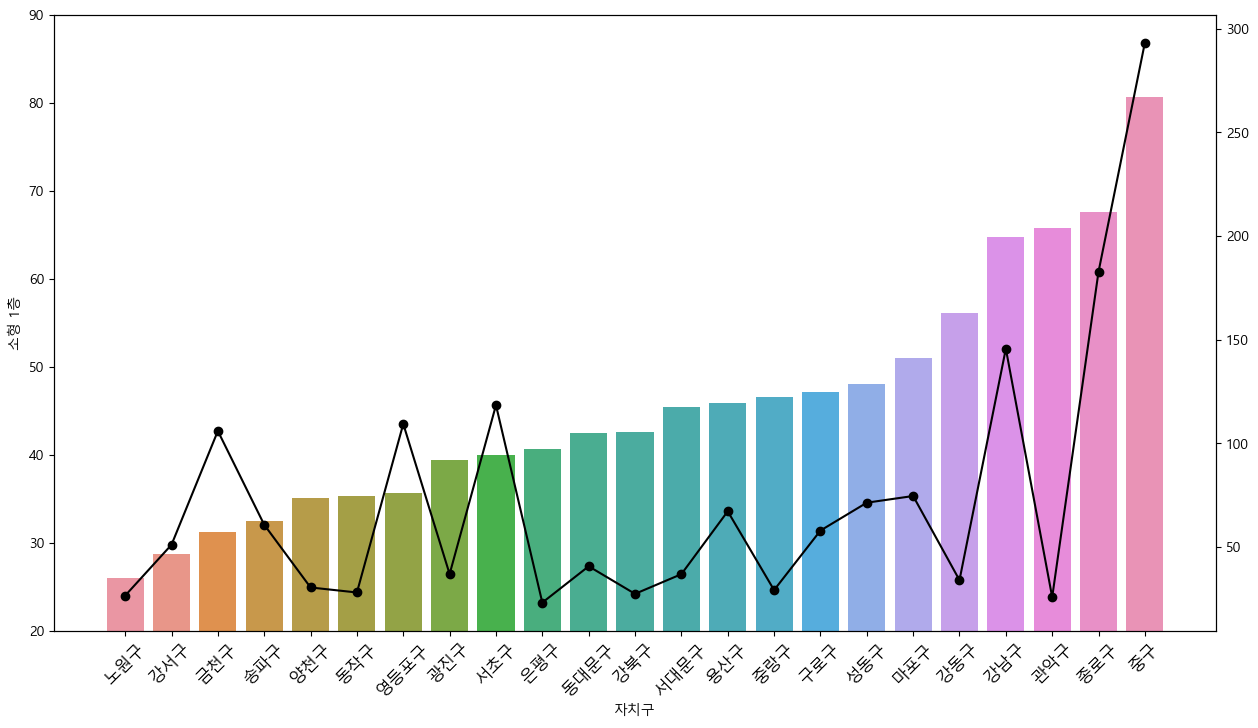

In [93]:
fig = plt.figure(figsize = (15, 8))

ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

groups = len(plot_data_sort_so.index)
idx = np.arange(groups)

sns.barplot(x = plot_data_sort_so.index, y = plot_data_sort_so["소형 1층"], ax = ax1)
ax1.set_ylim(20, 90)
ax2.plot(plot_data_sort_so.index, plot_data_sort_so["종사자수/자치구별인구"], "ko-")

ax1.set_xticklabels([i for i in plot_data_sort_so.index], rotation = 45, size = 12)

plt.show()

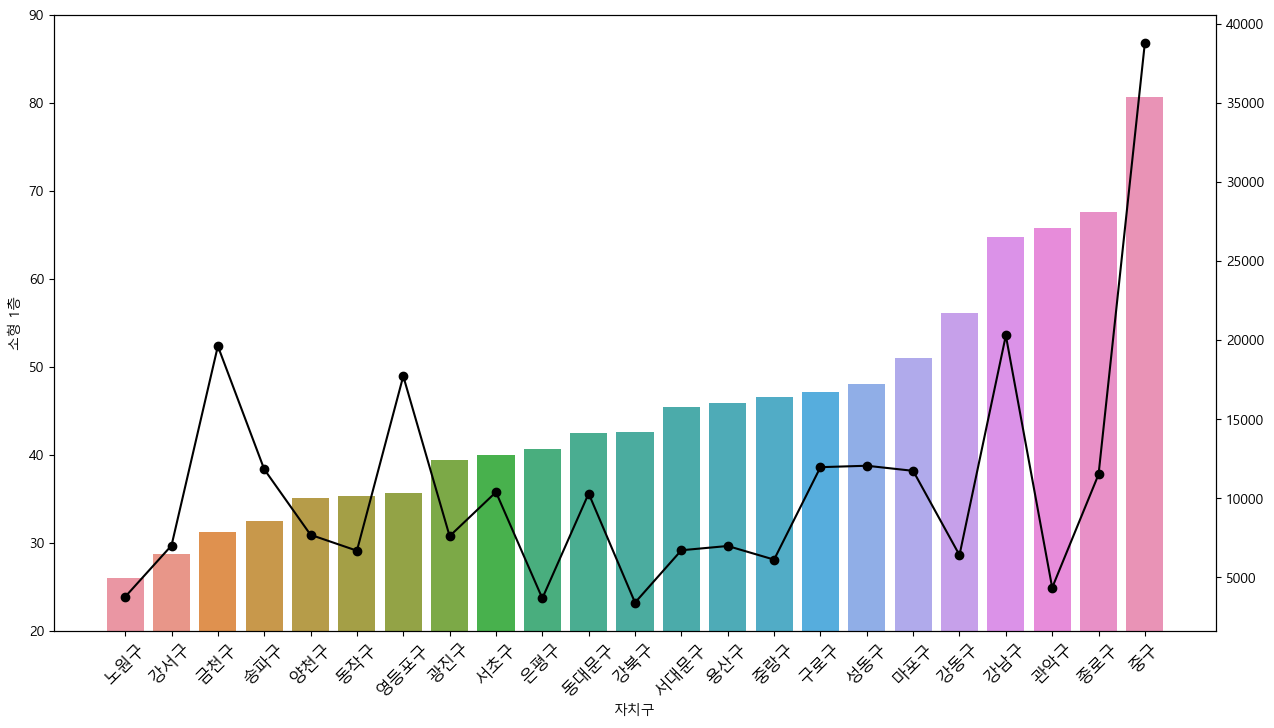

In [94]:
fig = plt.figure(figsize = (15, 8))

ax1 = fig.add_subplot(1, 1, 1)
ax2 = ax1.twinx()

groups = len(plt_3.index)
idx = np.arange(groups)

sns.barplot(x = plt_3.index, y = plt_3["소형 1층"], ax = ax1)
ax1.set_ylim(20, 90)
ax2.plot(plt_3.index, plt_3["종사자밀도(A)"], "ko-")

ax1.set_xticklabels([i for i in plt_3.index], rotation = 45, size = 12)

plt.show()

## 전처리 데이터 sqlite3에 저장

In [99]:
sqldata = plot_data.reset_index(drop = False)

In [100]:
sqldata

,자치구,중대형 1층,소형 1층,종사자밀도(A),종사자수/자치구별인구
0,강남구,64.542857,64.671429,20290.37,145.64
1,강동구,47.200000,56.100000,6403.49,33.99
2,강북구,45.933333,42.600000,3399.17,27.38
3,강서구,35.200000,28.700000,7007.42,51.07
4,관악구,72.800000,65.750000,4343.06,25.79
5,광진구,52.550000,39.400000,7601.65,36.93
6,구로구,45.200000,47.100000,11963.21,57.91
7,금천구,33.200000,31.200000,19619.01,105.95
8,노원구,29.600000,26.000000,3764.14,26.52
9,동대문구,44.325000,42.400000,10297.20,40.68


In [120]:
insert_query = """INSERT INTO analysis_data_empdata("borough", "mtolfirstfloor", "smallfirstfloor", "empdensity", "emptopopul") VALUES(?, ?, ?, ?, ?)"""

for i in range(len(sqldata)):
    data = tuple(list(sqldata.iloc[i,:]))
    
    conn = sqlite3.connect(r"C:\Users\ITSC\Desktop\2st_miniprj\git\web\db.sqlite3")
    cur = conn.cursor()
    cur.execute(insert_query, data)
    cur.close()
    conn.commit()
    conn.close()

In [91]:
#  %matplotlib inline

<IPython.core.display.Javascript object>


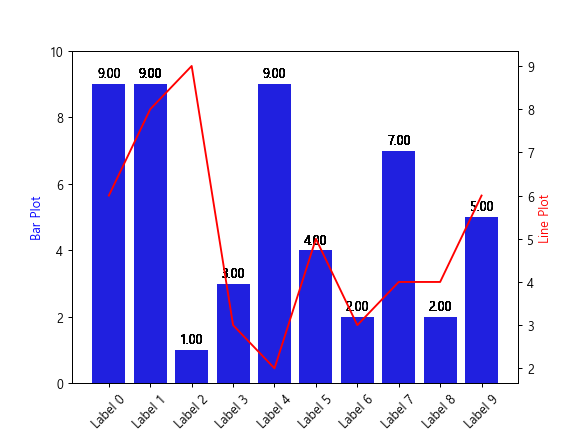

In [86]:
#  %matplotlib notebook

x = np.arange(10)  # x축 데이터
y1 = np.random.randint(1, 10, size=10)  # 첫 번째 y축 데이터
y2 = np.random.randint(1, 10, size=10)  # 두 번째 y축 데이터

fig, ax1 = plt.subplots()  # 첫 번째 y축을 가진 subplot 생성
sns.barplot(x=x, y=y1, ax=ax1, color='b')  # seaborn의 bar plot을 ax1에 추가
ax1.set_ylabel('Bar Plot', color='b')  # 첫 번째 y축 레이블

# 첫 번째 y축의 범위를 설정합니다.
ax1.set_ylim(0, 10)  # 원하는 범위로 설정

ax2 = ax1.twinx()  # 두 번째 y축을 가진 subplot 생성
ax2.plot(x, y2, color='r')  # plot을 ax2에 추가
ax2.set_ylabel('Line Plot', color='r')  # 두 번째 y축 레이블

# xticks를 조정합니다.
ax1.set_xticklabels([f"Label {i}" for i in x], rotation=45)  # 45도 회전

# 마우스 이벤트 핸들러 함수
def on_plot_hover(event):
    for bar in ax1.patches:
        # 각 막대의 경계 상자 확인
        if bar.contains(event)[0]:
            # 마우스가 위치한 막대의 값을 가져와서 텍스트로 표시
            ax1.annotate(f'{bar.get_height():.2f}', 
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         xytext=(0, 3), 
                         textcoords='offset points', 
                         ha='center', 
                         va='bottom',
                         color='black')
    else:
        ax1.annotate('', xy=(0, 0), xytext=(0, 0))  # 아무런 값도 표시하지 않음

# 마우스 이벤트 연결
fig.canvas.mpl_connect('motion_notify_event', on_plot_hover)

plt.show()